# PX912: Solid Mechanics - Workshop 4

Computation of various quantities in the finite element solution process requires evaluation of integrals, such as it is in the case of the element stiffness matrix $\mathbf{K}^e$. In general, the integration process must be carried out numerically. Here we'll code Gauss quadrature in Question 1 in order to do this.

In Question 2 we will look at a single finite element solution process for a simple 2D problem in linear elasticity. 

The cell below loads the core library written for this module. 

In [ ]:
# Matplotlib for plotting
import matplotlib.pyplot as plt

# Numpy for numerics
import numpy as np
import sympy as sym
sym.init_printing()

## Question 1

Implement Gauss quadrature to obtain exact values for the following
integrals, and verify by analytical integration.

**a)** 
$$
I_a = \int^{1}_{-1} \left( \xi^4 + 2 \xi^2 \right) \text{d}\xi
$$

In [ ]:
numerical_a = ...

exact_a = ...

print('Exact result is: ', exact_a)

**b)** 
$$
I_b = \int^{4}_{0} \left( x^2 + 1 \right) \text{d}x
$$

In [ ]:
numerical_b = ...

exact_b = ...

print('Exact result is: ', exact_b)

## Question 2
Consider a linear elasticity problem on a trapezoidal panel domain subject to external tractions, as shown below:

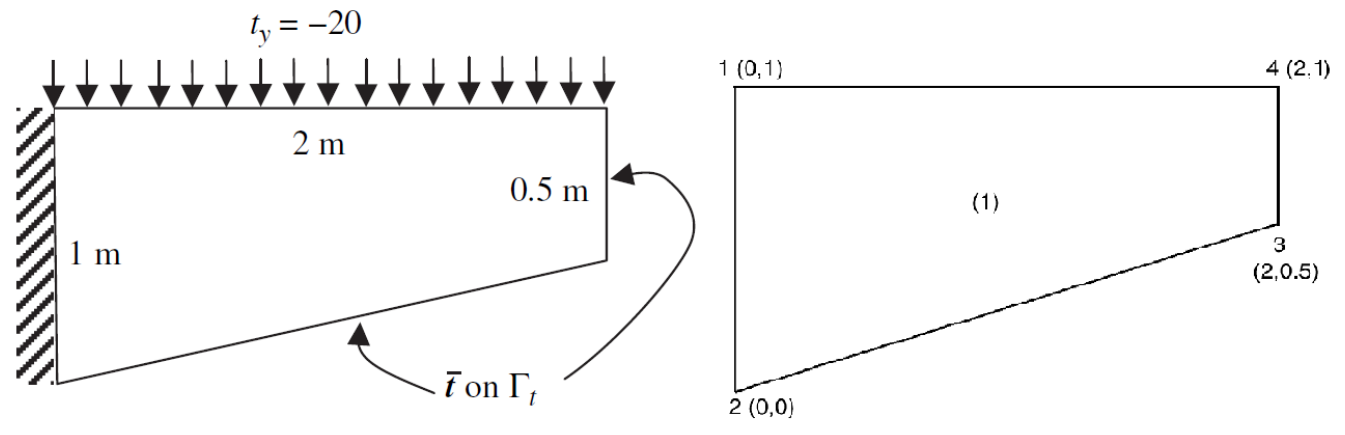

The panel is made of a material with Young’s modulus
$E =30$ MPa and Poisson’s ratio $\nu=0.3$. Plane stress conditions are
assumed. The problem is discretised with a linear quadrilateral element.
Compute strains and stresses at element integration (Gauss) points using
the finite element approach.

### 1. Evaluate the element stiffness matrix

The element stiffness matrix is defined as 

$$
\mathbf{K}^{e} = \int \mathbf{B}^{eT} \mathbf{C}^e \mathbf{B}^e \text{d}{Q} = 
\int_{-1}^1 \int_{-1}^1 \mathbf{B}^{eT} \mathbf{C}^e \mathbf{B}^e
\text{det}(\mathbf{J}^e) \ \text{d}\eta \ \text{d}\xi,
$$

where $\mathbf{B}^e$ is the element strain-displacement matrix and $\mathbf{C}^{e}$ is the element elasticity matrix. 

###       1.1. Find the element strain-displacement matrix (and its transpose)

The element strain-displacement matrix for a 4-node quad element is a [8 x 3] matrix
$$
\mathbf{B}^{e}=[\mathbf{B}_1 \ \mathbf{B}_2 \ \mathbf{B}_3 \ \mathbf{B}_4]
$$
where 
$$
\mathbf{B}_I=
\left[ \begin{matrix}
\frac{\partial \mathbf{N}^e_I}{\partial x_1} &
0 \\
0 &
\frac{\partial \mathbf{N}^e_I}{\partial x_2}
\\
\frac{\partial \mathbf{N}^e_I}{\partial x_2} &
\frac{\partial \mathbf{N}^e_I}{\partial x_1} \\
\end{matrix} \right],
$$
and $I=1,2,3,4$ denotes the node number. 



The following quantities are needed for this:

(1) shape functions in terms of natural coordinates and their derivatives

(2) inverse of the Jacobian matrix relating derivatives of shape functions in natural and physical coordinates



### 1.1.1. Element shape functions 

First write the element shape functions in terms of natural coordinates $\xi$ and $\eta$ for a linear quadrilateral element (QUAD4) - use either (a) formula from the lecture slides, or (b) derive it from first principles (useful from the revision point of view). 

Code it either using sympy (see below), or do it with a 'pen and paper' and type in relevant formulas. 

NOTE: Ultimately you will be solving your problem using NumPy. 

In [ ]:
xi, eta = sym.symbols('xi eta')

N1 = ...
N2 = ...
N3 = ...
N4 = ...

### 1.1.2. Jacobian matrix (and its inverse and determinant)

The element Jacobian matrix [2 x 2] is calculated from the expression 

$$
\mathbf{J}^e =
\frac{\partial \mathbf{x}^e}{\partial \boldsymbol{\xi}} =
\frac{\partial \mathbf{N}^e}{\partial \boldsymbol{\xi}} \mathbf{c}^e,
$$
where $\mathbf{c}^e$ is the nodal coordinate matrix [4 x 2], and $\boldsymbol{\xi}=[\xi \ \ \eta]^T$ is the 1 column matrix of natural coordinates. 

Following on the lecture notes, define $\mathbf{c}^e$ below.

In [ ]:
c_e = ...

Matrix of the derivatives of element shape functions w.r.t. natural coordinates $\xi$ and $\eta$ is defined as 
$$
\frac{\partial \mathbf{N}^e}{\partial \boldsymbol{\xi}} = 
\left[ \begin{matrix}
\frac{\partial \mathbf{N}^e_1}{\partial \mathbf{\xi}} &
\frac{\partial \mathbf{N}^e_2}{\partial \mathbf{\xi}} &
\frac{\partial \mathbf{N}^e_3}{\partial \mathbf{\xi}} &
\frac{\partial \mathbf{N}^e_4}{\partial \mathbf{\xi}} 
\\
\frac{\partial \mathbf{N}^e_1}{\partial \mathbf{\eta}} &
\frac{\partial \mathbf{N}^e_2}{\partial \mathbf{\eta}} &
\frac{\partial \mathbf{N}^e_3}{\partial \mathbf{\eta}} &
\frac{\partial \mathbf{N}^e_4}{\partial \mathbf{\eta}} 
\\
\end{matrix} \right],
$$

Write a function that provides this matrix automatically.

In [ ]:
def diff_shape(N1, N2, N3, N4):
    xi, eta = sym.symbols('xi eta')
    
    b1 = sym.Matrix([..., ...])
    b2 = sym.Matrix([..., ...])
    b3 = sym.Matrix([..., ...])
    b4 = sym.Matrix([..., ...])
    
    return sym.Matrix.hstack(b1, b2, b3, b4)

diff_shape(N1, N2, N3, N4)

Find the Jacobian matrix  

In [ ]:
J = ...
J

Find the determinant and the inverse of the Jacobian matrix

In [ ]:
detJ = ...
invJ = ...
detJ, invJ

Use the inverse of the Jacobian matrix to find the matrix of derivatives of shape functions [2 x 4] in physical coordinates $x_1$ and $x_2$ 

$$
\frac{\partial \mathbf{N}^e}{\partial \mathbf{x}}=(\mathbf{J}^e)^{-1} \frac{\partial \mathbf{N}^e}{\partial \boldsymbol{\xi}},
$$



and select relevant components of the above matrix to find the element strain-displacement matrix $\mathbf{B}^{e}$ [8 x 3] in physical coordinates.

In [ ]:
dnx = invJ * diff_shape(N1, N2, N3, N4)

def strain_displacement(dnx):
    ...
        
B = strain_displacement(dnx)

### 1.2. Element elasticity matrix $\mathbf{C}^{e}$ (Voigt notation)  

Define the element elasticity matrix $\mathbf{C}^e$ under plane stress assumption using the provided elastic constants E and $\nu$

In [ ]:
def Plane_Stress_C(E, nu):
    '''C matrix in the case of plane stress'''
    ...

In [ ]:
E = 3e7
nu = 0.3

C = ...

### 1.3. Use numerical integration to evaluate the element stiffness matrix 

Use the Gauss quadrature to evaluate the element stiffness at a given integration point (defined in terms of natural coordinates)

$$
\mathbf{K} =
\sum_{i=1}^2 \sum_{j=1}^2
W_1 W_2 \
\mathbf{B}^{eT} \mathbf{C}^e \mathbf{B}^e \
\text{det}(\mathbf{J}^e(\eta_i, \xi_i)).
$$

Use two integration points in each direction i.e $2\times 2$ Gauss quadrature. Specify the weights and natural coordinates of integration points (see appropriate Table in the lecture slides). 

In [ ]:
W1 = 1
W2 = 1

xi1, xi2 = ...
eta1, eta2 = ... 

# write the integration points in terms of eta and xi
ip1 = (..., ...)
ip2 = (..., ...)
ip3 = (..., ...)
ip4 = (..., ...)

Use the determinant of the Jacobian matrix (det $\mathbf{J^{e}}$) computed earlier to calculate $K^{}$ at every integration point 'ip'

In [ ]:
K_ip =  ...

Add up element stiffness matrix contributions from every integration point and sum the result together.

In [ ]:
K1 = K_ip.evalf(subs = {xi:ip1[0], eta:ip1[1]})
K2 = ...
K3 = ...
K4 = ...

K_e = K1 + K2 + K3 + K4

### 2. Define the nodal force vector for the element

For the applied tractions $\mathbf{t}$ use the expression for the nodal force vector for the element edge between nodes 1 and 4 - in the natural coordinates that edge cooresponds to $\xi=-1$:

$$
\mathbf{f}^{e}=\int_{0}^2 \mathbf{N}^{eT} \mathbf{t}\ \text{d}x \ = \int_{-1}^1 \mathbf{N}^{eT} (\xi=-1, \eta) \mathbf{t} \ J \ \text{d}\eta \ 
$$


Write an expression for the nodal force vector.

In [ ]:
f_e = ...
f_e

For completeness add relevant reaction forces at nodes 1 and 2 to the nodal force vector $\mathbf{f}^{e}$.

In [ ]:
fr = ...
fr

### 3. Consider all the matrices involved the static equilibrium problem in linear elasticity, and reduce their size by applying relevant (displacement) boundary conditions
 
The full static equilibrium problem involves $\mathbf{K^{e}}$ [8 x 8], $\mathbf{d^{e}}$ [8 x 1] and $\mathbf{f^{e}}$ [8 x 1] 
$$
\mathbf{K}^e \ \mathbf{d}^e = \mathbf{f}^e
$$



Apply the provided (displacement) boundary conditions to reduce the size of the full problem above - i.e. define the reduced matrices $\mathbf{K^{e}_R}$ [4 x 4] and $\mathbf{f^{e}_R}$ [4 x 1]. 

In [ ]:
K_eR = ...
f_eR = ...

K_eR, f_eR

### 4. Solve the reduced static equilibrium problem for the unknown nodal displacements

Use NumPy to solve for the reduced vector of nodal displacements 

$$
\mathbf{d}^e_R = (\mathbf{K}^e_R)^{-1}  \mathbf{f}^e_R
$$ 



In [ ]:
K_eR = np.array(K_eR).astype(np.float64)
f_eR = np.array(f_eR).astype(np.float64)

d_eR = ...
d_eR = sym.Matrix(d_eR)
d_eR

### 5. Compute the element strain matrix (Voigt notation) at the integration points 

For this define the (full) nodal displacement matrix $\mathbf{d}^{e}$ [8 x 1] using $\mathbf{d}^{e}_{R}$ [4 x 1]  

In [ ]:
d_e = ...
d_e

Compute strains (Voigt notation) at each integration point 
$$ \mathbf{\varepsilon}^e(\eta, \xi) = \mathbf{B}(\eta, \xi) \mathbf{d}^e \\ $$

In [ ]:
# sympy formula:
eps = ...

# evaluated formula:
eps1 = ...
.
.
.
eps4= ...

eps1, eps2, eps3, eps4

### 6. Compute the element stress matrix (Voigt notation) at the integration points

Compute stresses (Voigt notation) at each integration point
$$
\sigma^e(\eta, \xi) = \mathbf{C}^e \varepsilon^e(\eta, \xi)
$$

In [ ]:
# sympy formula:
sig = ... 

# evaluated formula:
sig_1 = ...
.
.
.
sig_4 = ...

sig1, sig2, sig3, sig4

### 7. Visualize the deformed shape of the panel

In [ ]:
# Plot element deformation (nodal displacements)
sdef=10000
d_e = np.array(d_e).astype(np.float64)

plt.plot(c_e[:, 0],
         c_e[:, 1], 'sk')
plt.plot(c_e[:, 0] + sdef*d_e[0:2*len(c_e)-1:2],
         c_e[:, 1] + sdef*d_e[1:2*len(c_e):2], 'or')

for i in range(len(c_e)):
    plt.fill(c_e[:, 0],
             c_e[:, 1], edgecolor='k', fill=False)
    plt.fill(c_e[:, 0] + sdef*d_e[0:2*len(c_e)-1:2],
             c_e[:, 1] + sdef*d_e[1:2*len(c_e):2], edgecolor='r', fill=False)
plt.show()